In [ ]:
# Spotify Top Tracks of 2023 Dataset

Instructions:

Load datasets and develop 10 SQL queries using Python (powerpoint slides, python code, show your queries, screenshots of results).



Using the Kaggle dataset from your group project, convert them into SQLite .db file using this code (Convert_csv_to_db.ipynb ). Then load the dataset to Google Colab, develop 10 queries (two of them have to be joint table queries). Submit the Google Colab file, and powerpoints and screenshots of your 10 queries, results. and meaning of each query,

10: successfully load the dataset into Google Colab, 10 correct queries and results.

8: successfully load the dataset into Google Colab, 8 correct queries and results.

6: successfully load the dataset into Google Colab, 6 correct queries and results.

4: successfully load the dataset into Google Colab, 4 correct queries and results.

# Imports

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_info = pd.read_csv('spotify_2023_track_spread.csv')
df_percents = pd.read_csv('spotify_2023_track_features.csv')

Drive Imports

In [ ]:
# imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_percents = pd.read_csv('/content/drive/MyDrive/I 320 D SQL in Python Project/spotify_2023_track_features.csv')
df_info = pd.read_csv('/content/drive/MyDrive/I 320 D SQL in Python Project/spotify_2023_track_spread.csv')

In [ ]:
df_info.head()

,track_id,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826
1,2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382
2,3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949
3,4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548
4,5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425


In [ ]:
df_percents.head()

,track_id,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,1,125,B,Major,80,89,83,31,0,8,4
1,2,92,C#,Major,71,61,74,7,0,10,4
2,3,138,F,Major,51,32,53,17,0,31,6
3,4,170,A,Major,55,58,72,11,0,11,15
4,5,144,A,Minor,65,23,80,14,63,11,6


# CSV to DB Conversion (Provided Code)

In [ ]:
import pandas as pd
import sqlite3
from google.colab import files

# List of CSV files to convert
csv_files = ['spotify_2023_track_spread.csv', 'spotify_2023_track_features.csv']

# Specify the desired SQLite database file
database_file = 'spotify2023.db'

# Create a SQLite connection
conn = sqlite3.connect(database_file)

# Iterate through CSV files and insert into the database
for csv_file in csv_files:
    # Extract table name from file name (assuming the file name ends with '.csv')
    table_name = csv_file.split('/')[-1].split('.')[0]

    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file, encoding='latin-1')

    # Write DataFrame to SQLite database
    df.to_sql(table_name, conn, index=False, if_exists='replace')

# Commit changes and close the connection
conn.commit()
#conn.close()

print(f'Data from CSV files has been successfully imported into the SQLite database: {database_file}')

Data from CSV files has been successfully imported into the SQLite database: spotify2023.db


In [ ]:
# Download the file
files.download(database_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# SQL Queries

##### Query 0: Making sure SQLite works



In [ ]:
# check different tables available in the database
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,spotify_2023_track_spread,spotify_2023_track_spread,2,"CREATE TABLE ""spotify_2023_track_spread"" (\n""ï..."
1,table,spotify_2023_track_features,spotify_2023_track_features,22,"CREATE TABLE ""spotify_2023_track_features"" (\n..."


In [ ]:
## Retrieve all columns from the 'actor' table
spread = pd.read_sql("""SELECT * FROM spotify_2023_track_spread;""", conn)
spread.head(5)

,ï»¿track_id,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826
1,2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382
2,3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949
3,4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548
4,5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425


In [ ]:
spread.columns

Index(['ï»¿track_id', 'track_name', 'artist(s)_name', 'artist_count',
       'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts'],
      dtype='object')

In [ ]:
features = pd.read_sql("""SELECT * FROM spotify_2023_track_features;""", conn)
features.head(5)

,track_id,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,1,125,B,Major,80,89,83,31,0,8,4
1,2,92,C#,Major,71,61,74,7,0,10,4
2,3,138,F,Major,51,32,53,17,0,31,6
3,4,170,A,Major,55,58,72,11,0,11,15
4,5,144,A,Minor,65,23,80,14,63,11,6


##### Query 1: Find the tracks with their features that have the highest (top 5) danceability percentage.

(**I had to hardcode the ï»¿track_id**, it doesn't properly read the csv for some reason but I swear it is the same file! - Fiona)



In [ ]:
query1 = """
SELECT s.track_name, s."artist(s)_name", f."danceability_%"
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
ORDER BY f."danceability_%" DESC
LIMIT 5;
"""

In [ ]:
df_query1 = pd.read_sql(query1, conn)
df_query1

,track_name,artist(s)_name,danceability_%
0,Peru,"Ed Sheeran, Fireboy DML",96
1,Players,Coi Leray,95
2,The Real Slim Shady,Eminem,95
3,CAIRO,"Karol G, Ovy On The Drums",95
4,Super Freaky Girl,Nicki Minaj,95


##### Query 2: List the tracks released in 2023 that are present in both Spotify and Apple playlists.

(Fiona)



In [ ]:
query2 = """
SELECT s.track_name, s."artist(s)_name", s.released_year
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
WHERE s.in_spotify_playlists >= 1 AND s.in_apple_playlists >= 1;
"""

In [ ]:
df_query2 = pd.read_sql(query2, conn)
df_query2

,track_name,artist(s)_name,released_year
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023
1,LALA,Myke Towers,2023
2,vampire,Olivia Rodrigo,2023
3,Cruel Summer,Taylor Swift,2019
4,WHERE SHE GOES,Bad Bunny,2023
...,...,...,...
925,My Mind & Me,Selena Gomez,2022
926,Bigger Than The Whole Sky,Taylor Swift,2022
927,A Veces (feat. Feid),"Feid, Paulo Londra",2022
928,En La De Ella,"Feid, Sech, Jhayco",2022


##### Query 3: Which tracks have high energy and what's their corresponding BPM?

(Fiona)



In [ ]:
query3 = """
SELECT s.track_name, s."artist(s)_name", f."energy_%", f.bpm
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
WHERE f."energy_%" > 75
ORDER BY f."energy_%" DESC;
"""

In [ ]:
df_query3 = pd.read_sql(query3, conn)
df_query3

,track_name,artist(s)_name,energy_%,bpm
0,I'm Good (Blue),"Bebe Rexha, David Guetta",97,128
1,Murder In My Mind,Kordhell,97,120
2,Ta OK,"dennis, MC Kevin o Chris",96,130
3,That That (prod. & feat. SUGA of BTS),"PSY, Suga",96,130
4,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",95,158
...,...,...,...,...
268,Alien Blues,Vundabar,76,82
269,295,Sidhu Moose Wala,76,90
270,Caile,Luar La L,76,122
271,Talk,YEAT,76,140


##### Query 4: Listing the tracks released in each month of 2023 along with their total streams.

(Fiona)



In [ ]:
query4 = """
SELECT s.released_month, SUM(CAST(s.streams AS INTEGER)) / 1e9 AS total_streams_in_billions
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
GROUP BY s.released_month
ORDER BY s.released_month;
"""

In [ ]:
df_query4 = pd.read_sql(query4, conn)
df_query4

,released_month,total_streams_in_billions
0,1,96.758316
1,2,21.542364
2,3,41.026524
3,4,26.673635
4,5,53.205639
5,6,35.263842
6,7,29.894942
7,8,29.038222
8,9,41.140084
9,10,42.989875


##### Query 5:  Find the average danceability percentage for tracks released in each month of 2023.


In [ ]:
query5 = """
SELECT s.released_month, AVG(f."danceability_%") AS avg_danceability
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
GROUP BY s.released_month
ORDER BY s.released_month;
"""


In [ ]:
df_query5 = pd.read_sql(query5, conn)
df_query5

,released_month,avg_danceability
0,1,65.522388
1,2,67.491803
2,3,67.186047
3,4,67.712121
4,5,68.609375
5,6,71.965116
6,7,67.145161
7,8,66.782609
8,9,68.428571
9,10,62.671233


##### Query 6: Identify tracks with high valence and their corresponding popularity in Spotify playlists.



In [ ]:
query6 = """
SELECT s.track_name, s."artist(s)_name", f."valence_%", s.in_spotify_playlists
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
WHERE f."valence_%" > 80
ORDER BY f."valence_%" DESC;
"""

In [ ]:
df_query6 = pd.read_sql(query6, conn)
df_query6

,track_name,artist(s)_name,valence_%,in_spotify_playlists
0,Zona De Perigo,Leo Santana,97,531
1,Doja,Central Cee,97,4169
2,There's Nothing Holdin' Me Back,Shawn Mendes,97,12382
3,En El Radio Un Cochinero,Victor Cibrian,97,514
4,JGL,"Luis R Conriquez, La Adictiva",97,782
...,...,...,...,...
119,Why'd You Only Call Me When You're High?,Arctic Monkeys,81,23389
120,on the street (with J. Cole),"j-hope, J. Cole",81,615
121,A Holly Jolly Christmas - Single Version,Burl Ives,81,7930
122,La Zona,Bad Bunny,81,1188


##### Query 7:  List the top 10 tracks with the highest instrumentalness and their release details.



In [ ]:
query7 = """
SELECT s.track_name, s."artist(s)_name", f."instrumentalness_%", s.released_year, s.released_month, s.released_day
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
ORDER BY f."instrumentalness_%" DESC
LIMIT 10;
"""

In [ ]:
df_query7 = pd.read_sql(query7, conn)
df_query7

,track_name,artist(s)_name,instrumentalness_%,released_year,released_month,released_day
0,Alien Blues,Vundabar,91,2015,7,24
1,METAMORPHOSIS,INTERWORLD,90,2021,11,25
2,Poland,Lil Yachty,83,2022,6,23
3,Forever,Labrinth,72,2019,10,4
4,WHERE SHE GOES,Bad Bunny,63,2023,5,18
5,Freaks,Surf Curse,63,2015,5,10
6,Static,Steve Lacy,63,2022,7,15
7,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",61,2022,6,15
8,Makeba,Jain,51,2015,6,22
9,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",51,2023,6,2


##### Query 8: Find the correlation between danceability and energy for tracks with a high number of streams (>1 billion).



In [ ]:
query8 = """
SELECT f."danceability_%", f."energy_%"
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
WHERE CAST(s.streams AS INTEGER) > 1e9;
"""

In [ ]:
df_query8 = pd.read_sql(query8, conn)
df_query8

,danceability_%,energy_%
0,71,68
1,52,73
2,64,73
3,48,42
4,75,68
...,...,...
147,61,62
148,32,72
149,52,48
150,45,90


##### Query 9: Count the number of tracks in each key and order the result by key popularity.



In [ ]:
query9 = """
SELECT f.key, COUNT(*) AS track_count
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
GROUP BY f.key
ORDER BY track_count DESC;
"""

In [ ]:
df_query9 = pd.read_sql(query9, conn)
df_query9

,key,track_count
0,C#,120
1,G,96
2,None,95
3,G#,91
4,F,89
5,D,81
6,B,81
7,A,75
8,F#,73
9,E,62


##### Query 10: Identify tracks with high acousticness that are currently in the Apple charts.



In [ ]:
query10 = """
SELECT s.track_name, s."artist(s)_name", f."acousticness_%", s.in_apple_charts
FROM spotify_2023_track_spread s
JOIN spotify_2023_track_features f ON s.ï»¿track_id = f.track_id
WHERE f."acousticness_%" > 70 AND s.in_apple_charts = 1;
"""

In [ ]:
df_query10 = pd.read_sql(query10, conn)
df_query10

,track_name,artist(s)_name,acousticness_%,in_apple_charts
0,Zona De Perigo,Leo Santana,75,1
1,Sem AlianÃ¯Â¿Â½Ã¯Â¿Â½a no,"MC Xenon, Os Gemeos da Putaria",73,1
2,Running Up That Hill (A Deal With God),Kate Bush,72,1
3,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,91,1
4,Phantom Regret by Jim,The Weeknd,75,1
5,The Joker And The Queen (feat. Taylor Swift),"Ed Sheeran, Taylor Swift",92,1


# Machine Learning Model > Linear Regression

In [ ]:
print(df_info.columns)
print(df_percents.columns)

Index(['track_id', 'track_name', 'artist(s)_name', 'artist_count',
       'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts'],
      dtype='object')
Index(['track_id', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%'],
      dtype='object')


In [ ]:
import pandas as pd

In [ ]:
df_percents = df_percents.apply(pd.to_numeric, errors='coerce')

In [ ]:
df_merged = pd.merge(df_info, df_percents, left_on='track_id', right_on='track_id', how='left')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_id              953 non-null    int64  
 1   track_name            953 non-null    object 
 2   artist(s)_name        953 non-null    object 
 3   artist_count          953 non-null    int64  
 4   released_year         953 non-null    int64  
 5   released_month        953 non-null    int64  
 6   released_day          953 non-null    int64  
 7   in_spotify_playlists  953 non-null    int64  
 8   in_spotify_charts     953 non-null    int64  
 9   streams               953 non-null    object 
 10  in_apple_playlists    953 non-null    int64  
 11  in_apple_charts       953 non-null    int64  
 12  in_deezer_playlists   953 non-null    object 
 13  in_deezer_charts      953 non-null    int64  
 14  in_shazam_charts      903 non-null    object 
 15  bpm                   9

In [ ]:
df_merged['streams'] = pd.to_numeric(df_merged['streams'], errors='coerce')
conversions = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
            'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
for convert in conversions:
  df_merged[convert] = pd.to_numeric(df_merged[convert], errors='coerce')


In [ ]:
df_merged.describe()

,track_id,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.520000e+02,953.000000,953.000000,...,953.000000,0.0,0.0,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,477.000000,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.141374e+08,67.812172,51.908709,...,122.540399,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,275.251703,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668569e+08,86.441493,50.630241,...,28.057802,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,...,65.000000,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,239.000000,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.416362e+08,13.000000,7.000000,...,100.000000,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,477.000000,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.905309e+08,34.000000,38.000000,...,121.000000,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,715.000000,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738690e+08,88.000000,87.000000,...,140.000000,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,953.000000,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,...,206.000000,NaN,NaN,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Average number of streams in our dataset was 514 million streams. With the biggest song getting 3.7 billion streams. The top songs were blinding lights, shapre of you, someone you loved, dance monkey and sunflower.

In [ ]:
df_top = df_merged.sort_values(by='streams', ascending=False)
df_top.head()

,track_id,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,56,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,...,171,NaN,NaN,50,38,80,0,0,9,7
179,180,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,...,96,NaN,NaN,83,93,65,58,0,9,8
86,87,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,...,110,NaN,NaN,50,45,41,75,0,11,3
620,621,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,...,98,NaN,NaN,82,54,59,69,0,18,10
41,42,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,...,90,NaN,NaN,76,91,50,54,0,7,5


## Regressions

In [ ]:
streams_variance = df_merged['streams'].var()

print(f"Variance of the 'streams' column: {streams_variance}")

Variance of the 'streams' column: 3.213268006736707e+17


% Features to Streams

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

features0 = ['danceability_%', 'valence_%','energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%','speechiness_%']

target = 'streams'

In [ ]:
# Drop rows with missing values in any of the selected columns
df_regression = df_merged.dropna(subset=features0 + [target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_regression[features0], df_regression[target], test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression % to Streams MSE: {linear_mse}")

Linear Regression % to Streams MSE: 2.4754401743711437e+17


Playlists vs. Streams

In [ ]:
features1 = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']

In [ ]:
# Drop rows with missing values in any of the selected columns
df_regression = df_merged.dropna(subset=features1 + [target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_regression[features1], df_regression[target], test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression Playlist Counts to Streams MSE: {linear_mse}")

Linear Regression Playlist Counts to Streams MSE: 4.868785547333126e+16


Charts vs. Streams

In [ ]:
features2 = ['in_spotify_charts', 'in_apple_charts','in_deezer_charts', 'in_shazam_charts']

In [ ]:
# Drop rows with missing values in any of the selected columns
df_regression = df_merged.dropna(subset=features2 + [target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_regression[features2], df_regression[target], test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression Playlist and Chart Counts to Streams MSE: {linear_mse}")

Linear Regression Playlist and Chart Counts to Streams MSE: 1.6182670338721587e+17


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Drop rows with missing values in any of the selected columns
df_regression = df_merged.dropna(subset=features2 + [target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_regression[features2], df_regression[target], test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()

# Fit the model on the scaled training data
linear_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
linear_pred_scaled = linear_reg.predict(X_test_scaled)

# Calculate mean squared error
linear_mse_scaled = mean_squared_error(y_test, linear_pred_scaled)

print(f"Linear Regression Playlist and Chart Counts to Streams MSE with scaling: {linear_mse_scaled}")


Linear Regression Playlist and Chart Counts to Streams MSE with scaling: 1.6182670338721587e+17


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume df is your DataFrame, and 'target' is the name of your target column
# Assume 'features' is a list of feature column names

# Drop rows with missing values in any of the selected columns
df_regression = df_merged.dropna(subset=features2 + [target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_regression[features2], df_regression[target], test_size=0.2, random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the scaled training data
linear_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
linear_pred_scaled = linear_reg.predict(X_test_scaled)

# Calculate mean squared error
linear_mse_scaled = mean_squared_error(y_test, linear_pred_scaled)

print(f"Linear Regression MSE with scaling: {linear_mse_scaled}")


Linear Regression MSE with scaling: 1.6182670338721587e+17


**In conclusion, our linear regression is quite good at predicting the streams as the variance of streams is 3.213268006736707e+17 while the %s regression has an MSE of 2.4754401743711437e+17, charts regression has an MSE of 1.6182670338721587e+17, and playlists regression has an MSE of 4.868785547333126e+16.**

## Visualizations

Pair Plots

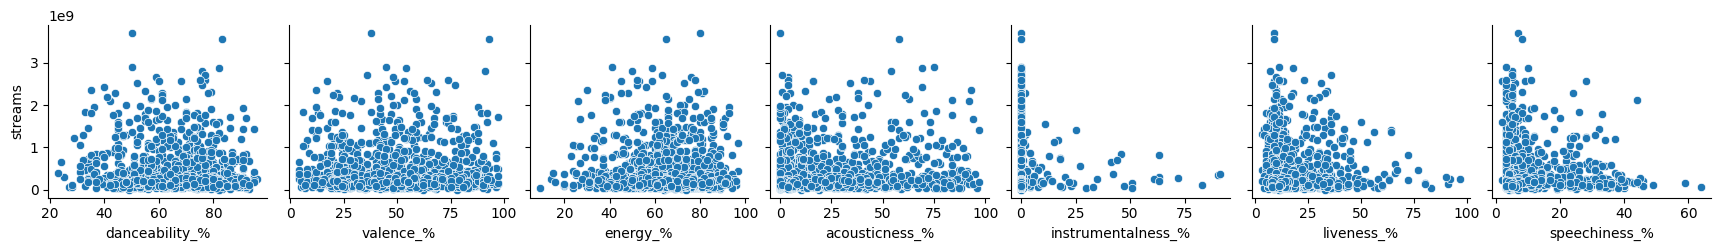

In [ ]:
import seaborn as sns

# Assuming df is your DataFrame with multiple features and 'target' is the target variable
sns.pairplot(df_merged, x_vars=features0, y_vars='streams', kind='scatter')
plt.show()

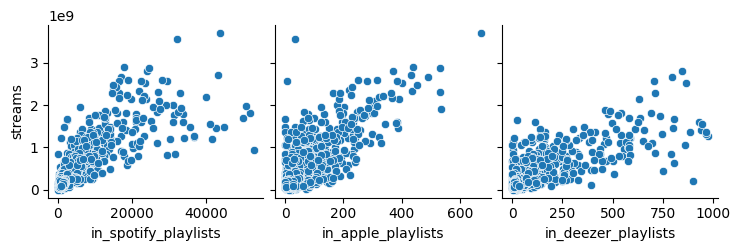

In [ ]:
import seaborn as sns

# Assuming df is your DataFrame with multiple features and 'target' is the target variable
sns.pairplot(df_merged, x_vars=features1, y_vars='streams', kind='scatter')
plt.show()

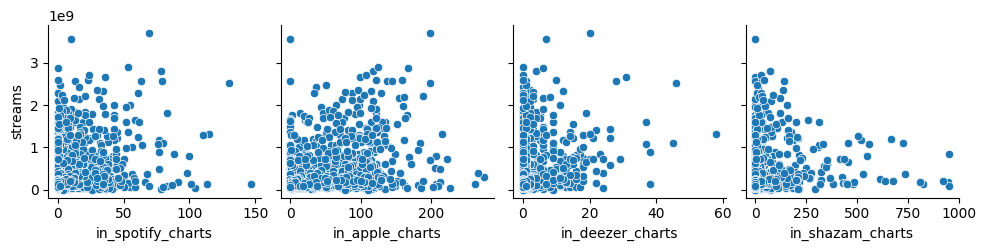

In [ ]:
import seaborn as sns

# Assuming df is your DataFrame with multiple features and 'target' is the target variable
sns.pairplot(df_merged, x_vars=features2, y_vars='streams', kind='scatter')
plt.show()

Correlation Heatmap

<ipython-input-25-f15c0e016ade>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_merged.corr()


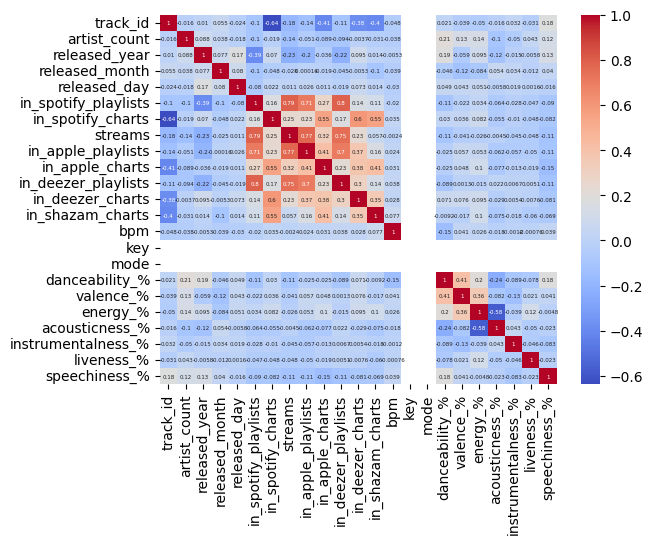

In [ ]:
correlation_matrix = df_merged.corr()

# Adjust the font size using the 'annot_kws' parameter
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 4})
plt.show()


<ipython-input-26-0fca30d33fb4>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_merged.corr()


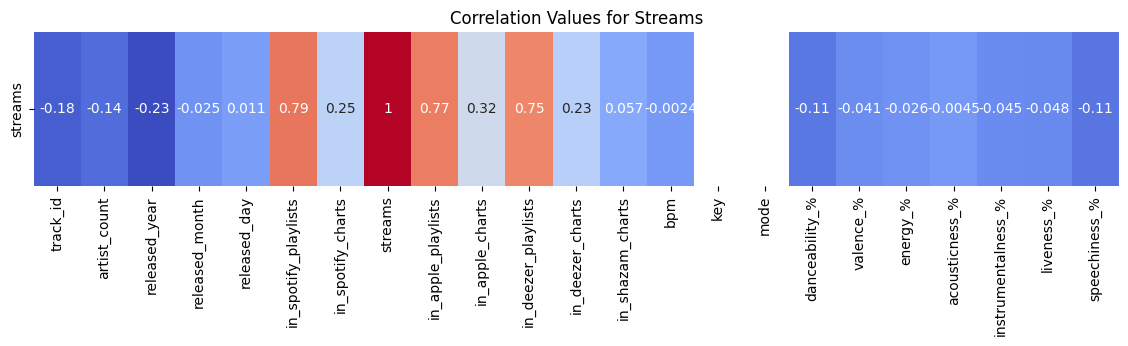

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_merged is your DataFrame
correlation_matrix = df_merged.corr()

# Extract a specific row (e.g., row with index 0)
specific_row = correlation_matrix.loc[correlation_matrix.index[7], :]

# Create a DataFrame with just the specific row
row_dataframe = pd.DataFrame(specific_row).transpose()
plt.figure(figsize=(14, 2))

# Plot the heatmap for the specific row
sns.heatmap(row_dataframe, annot=True, cmap='coolwarm', cbar=False, annot_kws={"size": 10})
plt.title("Correlation Values for Streams")
plt.show()
